# Import the Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np  
import pandas as pd  

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

In [3]:
dataset.head()  

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train Test and Split

In [4]:
X = dataset.iloc[:,:-1].values # whats the diff between [:,:-1] and [:,-1] inside iloc
y = dataset.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Preprocessing and Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbor Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knnclass = KNeighborsClassifier(n_neighbors=5)
knnclass.fit(X_train,y_train)

KNeighborsClassifier()

# Predictions & Evaluations

In [8]:
y_pred = knnclass.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

from sklearn.metrics import roc_auc_score
#Checking performance our model with ROC Score.
# print('ROCscore:',roc_auc_score(y_test, y_pred))

[[10  0  0]
 [ 0 11  1]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# Detection of Optimal Value for K Neighbors

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
#     print(np.mean(pred_i != y_test))
    error.append(np.mean(pred_i != y_test))

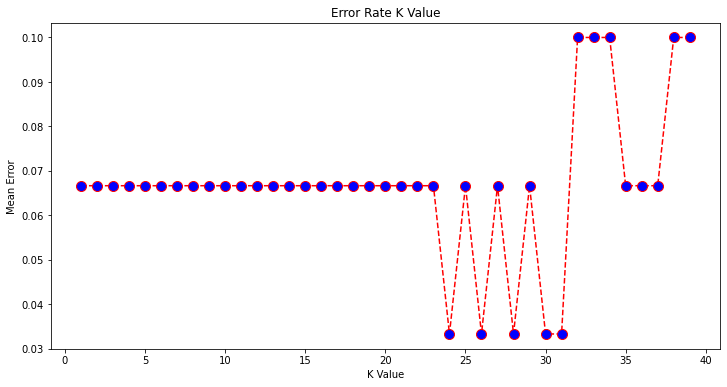

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

# GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {'n_neighbors':[5,6,7,8]}

clf = GridSearchCV(knnclass, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 30
Best n_neighbors: 7


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knnclass = KNeighborsClassifier(n_neighbors=10,leaf_size=30)
knnclass.fit(X_train,y_train)

y_pred = knnclass.predict(X_test)
y_pred

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[10  0  0]
 [ 0 11  1]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [24]:
# Use cross_val_score of sklearn to find optimal k
# We will be using following settings for all the cases below
k_values = np.arange(1, 16)
cross_validation_fold = 10
accuracies = []


In [26]:
from sklearn.model_selection import cross_val_score

for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X, y, cv=cross_validation_fold, scoring='accuracy', n_jobs=-1)
    accuracies.append(scores.mean())
print(accuracies)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334]


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning with python alone')

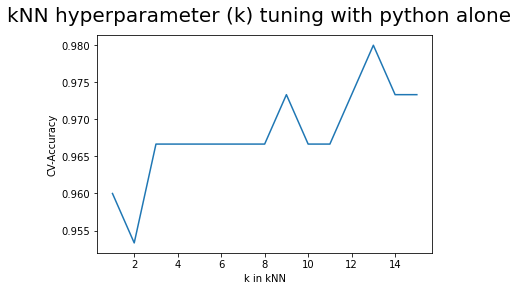

In [27]:
fig = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig.suptitle('kNN hyperparameter (k) tuning with python alone', fontsize=20)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knnclass = KNeighborsClassifier(n_neighbors=6,leaf_size=30)
knnclass.fit(X_train,y_train)

y_pred = knnclass.predict(X_test)
y_pred

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[10  0  0]
 [ 0 11  1]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [32]:
optimal_knn = clf.best_estimator_
optimal_knn.score(X_test,y_test)

0.9333333333333333

In [33]:
# Tuned using GridsearhCV, cross_val_score, Error_rate - All of them give optimal k value in the range of 4-10
# gridsearchcv gives accuracy as 93% 